In [1]:
library(tidyverse)
library(RColorBrewer)
library(ggvenn)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid



In [2]:
# Make simple table for analysis
Total.table <- read.csv("01.DESeq_results/total_rh_og_gene.csv")
Total.simple.table <- Total.table %>%
  dplyr::select(Gene, starts_with("log2"), starts_with("padj"))

#set the threshold
Th.lfc2 <- 1
Th.padj <- 0.05

# Filter the table
rh30up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_30min > Th.lfc2, padj_RHAM_30min < Th.padj)
rh90up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_90min > Th.lfc2, padj_RHAM_90min < Th.padj)
og30up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_30min > Th.lfc2, padj_OGs_30min < Th.padj)
og90up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_90min > Th.lfc2, padj_OGs_90min < Th.padj)
rh30down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_30min < -(Th.lfc2), padj_RHAM_30min < Th.padj)
rh90down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_90min < -(Th.lfc2), padj_RHAM_90min < Th.padj)
og30down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_30min < -(Th.lfc2), padj_OGs_30min < Th.padj)
og90down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_90min < -(Th.lfc2), padj_OGs_90min < Th.padj)

vennlistUp <- list( "rh30up" = rh30up$Gene,
                    "rh90up" = rh90up$Gene,
                    "og30up" = og30up$Gene,
                    "og90up" = og90up$Gene)
vennlistDown <- list(
  "rh30down" = rh30down$Gene,
  "rh90down" = rh90down$Gene,
  "og30down" = og30down$Gene,
  "og90down" = og90down$Gene)

vennlistUp <- lapply(vennlistUp, function(x) x[!is.na(x)])
vennlistDown <- lapply(vennlistDown, function(x) x[!is.na(x)])

Venn.color <- brewer.pal(4, "PRGn")

pdf 
  2

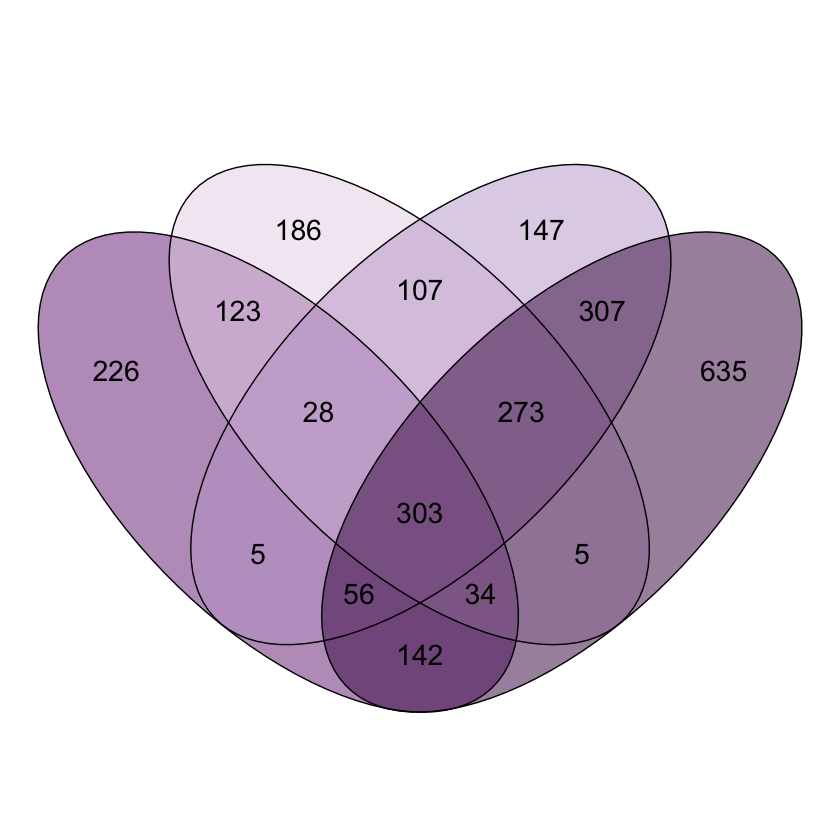

In [3]:
### Drawing the "monotone" Venn diagram -----
ggvenn.pr.up <- ggvenn(vennlistUp, c("rh90up", "rh30up","og30up", "og90up"),
                       fill_color = c("#762a83","#e7d4e8","#c2a5cf", "#40004b"),
                       stroke_size = 0.4, stroke_alpha = 100,
                       set_name_size = 0, show_percentage = FALSE,
                       text_size = 6)

pdf(file="05.Venndiagram/ggvennup_Pr.pdf",
    width = 4,
    height = 3)

ggvenn.pr.up

dev.off()

ggvenn.pr.up

pdf 
  2

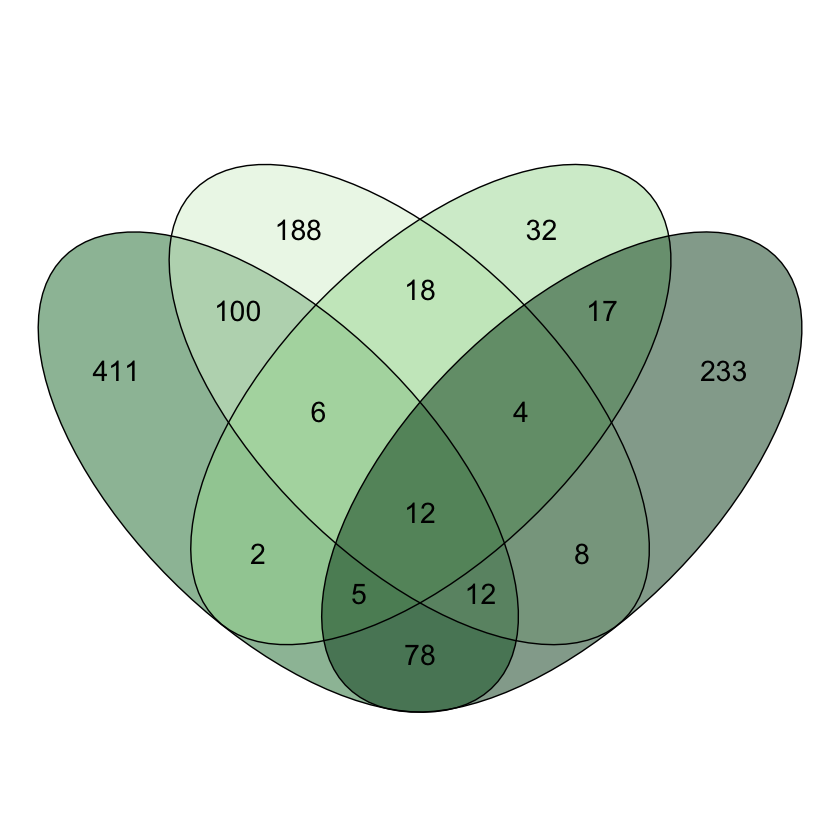

In [4]:
ggvenn.gn.down <- ggvenn(vennlistDown, c("rh90down", "rh30down","og30down", "og90down"),
                         fill_color = c("#1b7837","#d9f0d3","#a6dba0", "#00441b"),
                         stroke_size = 0.4, stroke_alpha = 100,
                         set_name_size = 0, show_percentage = FALSE,
                         text_size = 6)

pdf(file="05.Venndiagram/ggvenndown_Gn.pdf",
    width = 4,
    height = 3)

ggvenn.gn.down

dev.off()

ggvenn.gn.down
